In [ ]:
import json
import importlib
import graphing_results as g

storage_file = "test_results.json"

with open(storage_file, "r") as f:
    test_results = json.load(f)

model_prefixes = ['lichess9gb_8layer', 'random16M_8layer']  # Replace with your model prefixes
datasets_to_include = ['random100games', 'lichess13_100g_180m']  # Replace with your datasets

for model in model_prefixes:
    print(f"Evaluated checkpoints for model {model} are {test_results[model].keys()}")


Evaluated checkpoints for model lichess9gb_8layer are dict_keys(['22K', '2K', '21K', '30K', '40K', '50K', '60K', '70K', '80K', '90K', '100K'])
Evaluated checkpoints for model random16M_8layer are dict_keys(['6K', '12K', '22K'])


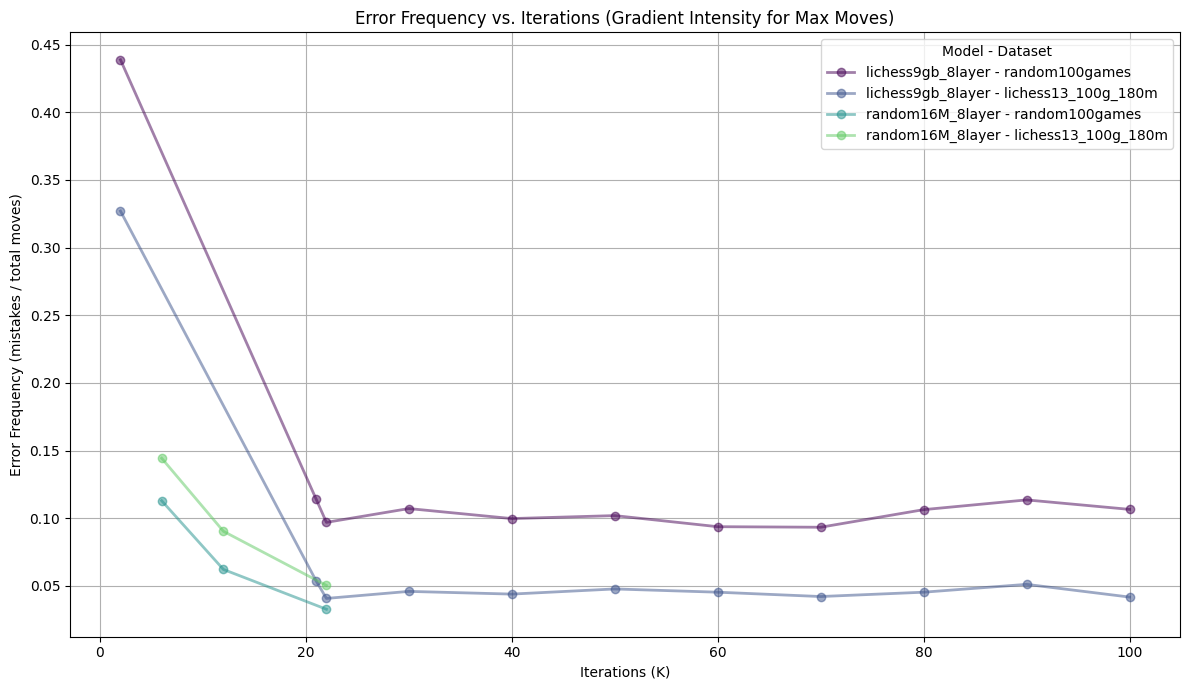

In [43]:

importlib.reload(g)

g.plot_error_frequencies(test_results,model_prefixes, datasets_to_include, [50])
